# Laporan Penerapan Operasi Dasar pada sinyal Digital dan Citra

Laporan ini mendemonstrasikan beberapa operasi dasar pada sinyal digital dan citra, seperti penskalaan, penggeseran, penjumlahan (efek gema), tujuannya adalah mampu memahami secara konseptual bagaimana sinya sinyal digital (1D) dan sinyal citra (2D) dapat dimodifikasi dan di manipulasi.

## Import Library yang dibutuhkan

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from scipy.io import wavfile
from IPython.display import display, Audio

## Pengolahan sinyal 1D

Sinyal 1D adalah sinyal yang nilainya (amplitudo) bergantung pada variable independen, umumnya waktu. dibagian ini kita akan me load sinyal 1D, dan 2D dalam ektensi .wav, untuk meresponse sinyal asli kita membutuhkan fungsi python yaitu **wavfile.read**, yang mana dalam function ini mengembalikan **sample_rate** (seberapa cepet sinyal diukur dalam satuan detik) dan **audio_data** (array amplitudo dari array tersebut).

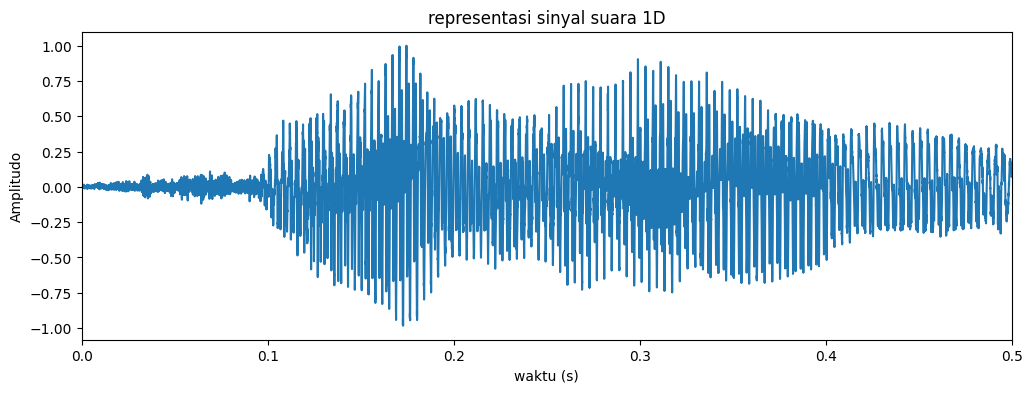

In [74]:
PATH_AUDIO = "/kaggle/input/sound-girl-saying-hello-and-mouse-click/783969__luamoon__girl-saying-hello-happy.wav"

try:
    #baca file 
    sample_rate, audio_data = wavfile.read(PATH_AUDIO)

    if (audio_data.ndim > 1):
        audio_data = audio_data[:, 0]

    #normalisasi
    audio_signal = audio_data.astype('float32') / np.max(np.abs(audio_data))

    #sumbu data 
    t = np.linspace(0., len(audio_signal) / sample_rate, len(audio_signal))

    #visualisasi awal
    plt.figure(figsize=(12, 4))
    plt.plot(t, audio_signal)
    plt.title("representasi sinyal suara 1D")
    plt.xlabel("waktu (s)")
    plt.ylabel("Amplitudo")
    plt.xlim(0, 0.5) #tampilkan 5 detik pertama
    plt.show()
    
except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{PATH_AUDIO}'.")
    print("Pastikan Anda sudah mengunggah file dan mengganti path di dalam kode.")
except Exception as e:
    print(f"Terjadi error: {e}")


### Operasi Penskalaan
Penskalaan  adalah sebuah perkalian setiap sampel aplitudo dengan sebuah konstanta, dalam konteks audio ini secara langsung mempengaruhi audi tersebut. Dalam visualisasi dibawah terbagi menjadi dua menjadi **suara diperkeras** dan **suara diperpelan**, ketika suara di perkeras akan memiliki puncak yang jauh lebih tinggi, sebaliknya untuk suara diperpelan maka memiliki amplitudo yang kecil.

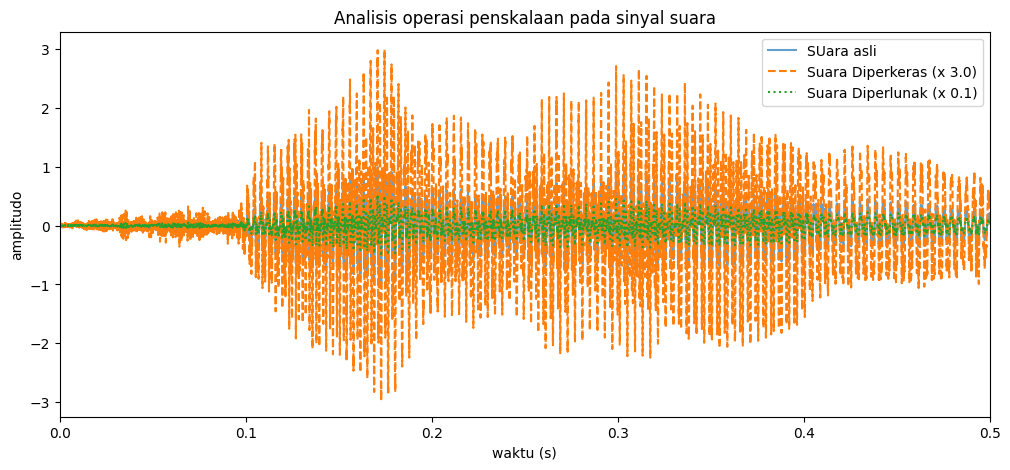

In [75]:
if 'audio_signal' in locals():
    #faktor skala untuk memperkeras dan memperlemah
    faktor_keras = 3.0
    faktor_pelan = 0.1

    #operasi penskalaan
    suara_keras = faktor_keras * audio_signal
    suara_pelan = faktor_pelan * audio_signal

    #visualisasi dan perbandingan
    plt.figure(figsize=(12, 5))
    plt.plot(t, audio_signal, label="SUara asli", alpha=0.7)
    plt.plot(t, suara_keras, label=f'Suara Diperkeras (x {faktor_keras})', linestyle='--')
    plt.plot(t, suara_lemah, label=f'Suara Diperlunak (x {faktor_pelan})', linestyle=':')
    plt.title('Analisis operasi penskalaan pada sinyal suara')
    plt.xlabel('waktu (s)')
    plt.ylabel('amplitudo')
    plt.xlim(0, 0.5) #zoom 0.5 detik pertama
    plt.legend()
    plt.show()

### Operasi penggeseran & penjumlahan (efek gama & echo)
Efek audio yang lebih kompleks seperti gema dapat diciptakan dengan mengombinasikan beberapa operasi dasar. Gema adalah hasil dari penjumlahan sinyal asli dengan versi dirinya yang telah digeser waktunya (delay) dan diskalakan (dilemahkan). Pada visualisasi dibawah **suara dengan gema** memiliki bentuk gelombang yang lebih kompleks. Setiap puncak pada sinyal asli diikuti oleh puncak serupa yang lebih kecil 0.25 detik kemudian. Ini secara visual merepresentasikan fenomena gema dan membuktikan bahwa kombinasi operasi dasar dapat menghasilkan efek yang berarti.

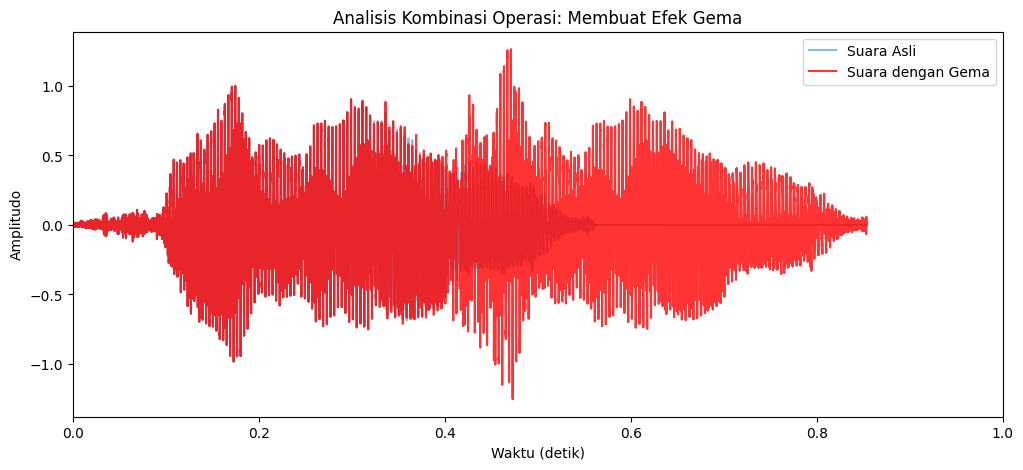

In [76]:
if 'audio_signal' in locals():
    # Membuat sinyal gema
    delay_detik = 0.3
    delay_sampel = int(delay_detik * sample_rate)
    faktor_lemah_gema = 1

    # Buat array kosong untuk sinyal gema
    suara_dengan_gema = np.copy(audio_signal)

    # Ambil sinyal asli yang dilemahkan
    gema = faktor_lemah_gema * audio_signal

    # Tambahkan gema ke sinyal asli setelah delay
    suara_dengan_gema[delay_sampel:] += gema[:-delay_sampel]

    # --- Visualisasi Perbandingan ---
    plt.figure(figsize=(12, 5))
    plt.plot(t, audio_signal, label='Suara Asli', alpha=0.5)
    plt.plot(t, suara_dengan_gema, label='Suara dengan Gema', color='red', alpha=0.8)
    plt.title("Analisis Kombinasi Operasi: Membuat Efek Gema")
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Amplitudo")
    plt.xlim(0, 1.0) # Zoom in ke 1 detik pertama agar efek terlihat
    plt.legend()
    plt.show()


## hasil Suara
kita menggunakan fungsi di python yaitu **Audio** untuk memutar setiap sinyal.

In [77]:
if 'audio_signal' in locals():
    print('please play the button')
    print('-' * 60)

    #suara asli
    print('1. suara asli')
    display(Audio(data=audio_signal, rate=sample_rate))

    #suara penskalaan
    print('2. Suara diperkeras')
    display(Audio(data=suara_keras, rate=sample_rate))

    print('3. Suara diperlemah')
    display(Audio(data=suara_lemah, rate=sample_rate))
    
    #suara hsil kombinasi
    print('4. suara kombinasi')
    display(Audio(data=suara_dengan_gema, rate=sample_rate))
else:
    print("Sinyal audio belum dibuat. Jalankan sel-sel sebelumnya terlebih dahulu.")

please play the button
------------------------------------------------------------
1. suara asli


2. Suara diperkeras


3. Suara diperlemah


4. suara kombinasi


## Operasi dasar pada signal 2D
Sinyal 2D (citra) adalah fungsi yang nilainya (intensitas piksel) bergantung pada dua variabel spasial (koordinat x dan y). Kita akan menggunakan gambar sebuah produk untuk demonstrasi.

Kita memuat file gambar menggunakan library **PIL**, mengubahnya menjadi format **gray-scale** untuk menyerderhanakan operasi, dan mempresentasikanya menjadi matriks **numpy**. Dalam hasil tersebut gambar sudah direpresentasikan sebagai matriks 2D dimana setiap elementnya adalah 0 (hitam) dan 1 (putih)

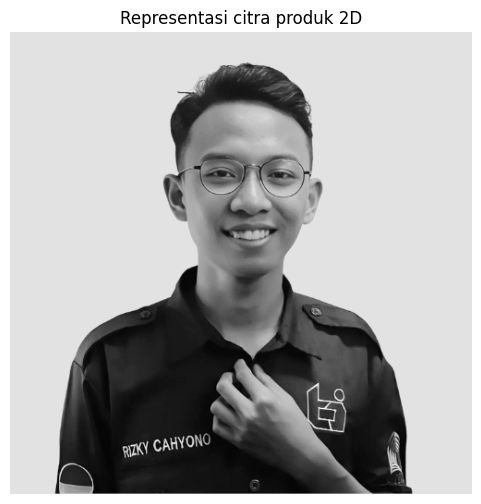

In [78]:
PATH_GAMBAR = '/kaggle/input/sound-girl-saying-hello-and-mouse-click/personal.png'

try:
    #buka gambar
    img = Image.open(PATH_GAMBAR).convert('L')

    #konversi  gambar dan normalisasi
    product_image = np.array(img).astype('float32') / 255.

    #visualissi
    plt.figure(figsize=(6, 6))
    plt.imshow(product_image, cmap='gray')
    plt.title("Representasi citra produk 2D")
    plt.axis('off')
    plt.show

except FileNotFoundError:
    print(f"ERROR: File tidak ditemukan di '{PATH_GAMBAR}'.")
    print("Pastikan Anda sudah mengunggah file dan mengganti path di dalam kode.")
except Exception as e:
    print(f"Terjadi error: {e}")

### operasi penskalaan (mengatur kecerahan)

Penskalaan citra dilakukan dengan mengalikan setiap nilai piksel dalam matriks dengan sebuah skalar. operasi ini secara langsung mengubah kecerahan (brightness) dari gambar tersebut. Pada gambar dibawah ini dengan mengalikan setiap matriks dengan skalar > 1 mengahasilkan gambar menjadi lebih terang, sebaliknya dengan mengalikan matriks dengan skalar < 1 maka akan menjadi gelap.

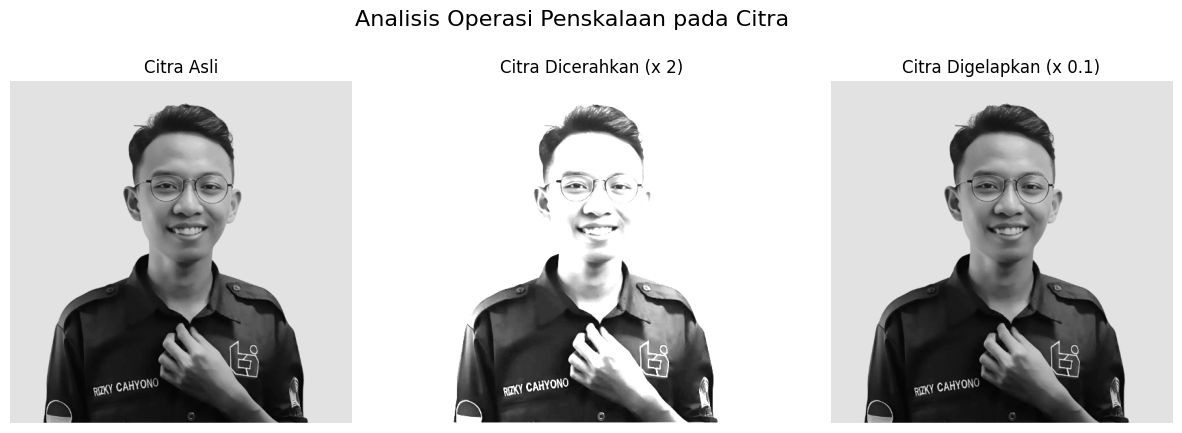

In [79]:
if 'product_image' in locals():
    faktor_cerah = 2
    faktor_gelap = 0.1

    #operasi penskalaan
    img_cerah = np.clip(product_image * faktor_cerah, 0, 1)
    img_gelap = product_image * faktor_gelap

    #visualisasi perbandingan
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(product_image, cmap='gray')
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_cerah, cmap='gray')
    plt.title(f'Citra Dicerahkan (x {faktor_cerah})')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_gelap, cmap='gray')
    plt.title(f'Citra Digelapkan (x {faktor_gelap})')
    plt.axis('off')

    plt.suptitle("Analisis Operasi Penskalaan pada Citra", fontsize=16)
    plt.show()
    

### operasi penjumlahan (menambahkan watermark)
Penjelasan Konseptual: Operasi penjumlahan dapat digunakan untuk menggabungkan dua citra. Kita akan melakukan eksperimen dengan membuat sebuah "rizky cahyono" (berisi teks) dan menambahkannya pada citra produk.

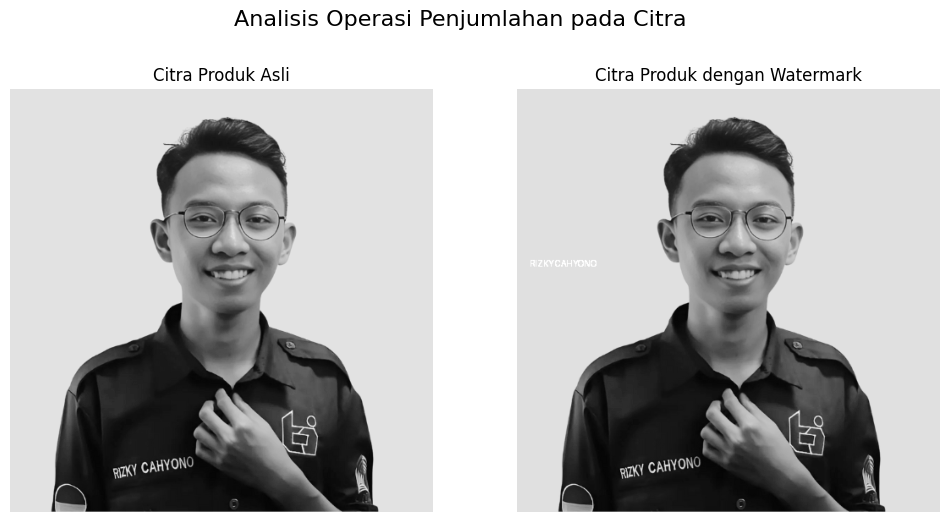

In [80]:
if 'product_image' in locals():
    #membuat watermark sederhana
    watermark = np.zeros_like(product_image)

    #watermark text
    watermark_pil = Image.fromarray((watermark * 255).astype(np.uint8))
    draw = ImageDraw.Draw(watermark_pil)

    try:
        #menggunakan font arial untk watermak
        font = ImageFont.truetype("arial.ttf", size=46)
    except IOError:
        font = ImageFont.load_default()
    draw.text((15, product_image.shape[0] - 300), "RIZKY CAHYONO", fill=500, font=font)
    watermark = np.array(watermark_pil).astype('float32') / 255.

    #menambahkan watermak dengan transparant
    alpha = 0.5
    img_watermarked = np.clip(product_image + (watermark * alpha), 0, 1)

    # --- Visualisasi Perbandingan ---
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(product_image, cmap='gray')
    plt.title('Citra Produk Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_watermarked, cmap='gray')
    plt.title('Citra Produk dengan Watermark')
    plt.axis('off')

    plt.suptitle("Analisis Operasi Penjumlahan pada Citra", fontsize=16)
    plt.show()
    

### Refleksi Pribadi dan Kesimpulan
Tantangan terbesar dalam proyek ini adalah menerjemahkan konsep teoritis dari operasi sinyal menjadi implementasi kode yang logis dan menghasilkan output yang dapat diinterpretasikan. Khususnya pada pembuatan efek gema, kami harus berpikir cermat tentang bagaimana operasi geser, skala, dan jumlah berinteraksi dalam domain waktu diskrit (sampel). Tantangan lain adalah memastikan data dari file lokal (misalnya, format audio stereo atau channel gambar) ditangani dengan benar melalui pra-pemrosesan agar kompatibel dengan operasi selanjutnya.